<a href="https://colab.research.google.com/github/Dreadwolf26/MLBeginnerNotesKindleBook/blob/main/Chapter8Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This chapter will mostly be based on unsupervised learning, we will only have access to the features of an instance and not its label. The goal here is not to predict what the labels would be this is all about finding the patterns within the dataset.


# 8.1 What is clustering?

In clustering the goal is to aggregregate instances into a few cohesive groups.

Doing so helps us solves an array of problems for instance we can cluster segement customer into different groups based on their shopping preferences.

We can use it to detect outliers (detecting instances that are not similiar to any known clusters) reduce the number of features in our training set or compress images.

# 8.2 K-Means Clustering

This is one of the most commonly used algos for clustering is k-menas clustering.

To perform k-means clustering we first have to decide on a number of clusters (k) next we choose **centroids** of these clusters randomly and perform the following steps in an interative manner:

- assign each training cluster based on its proximity to the cluster's centroid
- compute the mean of all the data points assigned to a cluster and use that to update the centroid
- after updating the centroids we assign points to repeat the updating and assigning steps until all the centroids stop changing.

Sample dataset to illustrate:

(2,2),(3,2),(3,1),(1,1) and (0,0)

We are wanting to cluster these points into two datasets. First we need to select two centroids at random say: (1.5,1.5) and (3,1.5) and name the clusters C1 and C2 respectively.

We would then need to assign each data point to the cluster with the nearest centroid. To do this we would use the **Euclidean distance Formula**

The table below shows the distance of each point from the two centroids.

Controid of C1 = (1.5,1.5)
Centroid of C2 = (3,1.5)

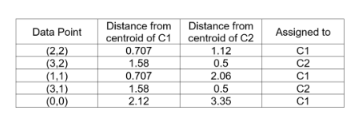

Based on the distances shown above we will assign (2,2), (1,1) and (0,0) to C1 and (3,2) and (3,1) to C2.

Now we need to calculate the mean of the data points in each cluster and us that yo update the centroid we will do that be example below:

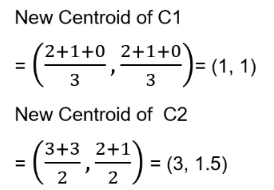


And then we are able to update our table:

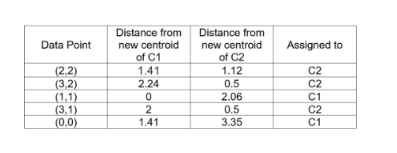

Most of the points remain in the same cluster except for (2,2) we need to recalculate the mean of the data points again. We continue to repeat this process of updating Centroids and reassigning data points until the cluster no longer changes. When this happens we say that the algo has converged thus the algo ends.

**8.2.1 Centroid intilization methods**

when using k-mean clustering there is two things that need to be understood.

first we need to choose the initial centroids. choosing the initial centroids is known as **initilization** and poor intiliazation can lead to sub optimal solutions.

For instance the chart below shows two identical sets of data point clustered differently due to the intial centroids.
while each gives us three clusters the solution on the right is better as the points within each cluster are closer to their centroids.

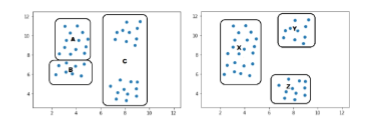

There are two ways to select intiial centroids.

1. run the entire k-means algo multiple times with randomly selected centroids. for each run we compute the sum of the squared distances between each instance of its final cluster. When can then compare the inertias of all the runs and choose the run with the smallest inertia.

2. Another technique is known as k-menas++ this techniques uses additional computing to determin centroids that are distant from one another and has been shown to result in faster convergence and better results. sklearn uses k-means++ by default.

**8.2.2 Determing the number of clusters**

We can do this a few different ways.

1. plotting the data in a scatter plot, but this only works with datasets that are simple in nature.

2. The elbow method: running the k-mens algo multiple times with different numbers of clusters and calculating the inertia of each run. This will continue until we have a group of clusters and their inertia decrease.

# 8.3 K Means Clustering with Scikit-Learn

Using the clustering.csv

In [1]:
from ast import increment_lineno
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('clustering.csv')

print(df.isnull().sum())
df.head()

X1    0
X2    0
dtype: int64


,X1,X2
0,-4.581081,-8.286462
1,-0.753894,1.864580
2,9.019485,0.356573
3,-3.293414,6.087256
4,7.042307,1.157019


We do not need to do any preprocessing because there are no missing values in the dataset.

We also do not have any labels in the dataset so we do not need to split into training and test sets.

In [2]:
df.describe()


,X1,X2
count,500.000000,500.000000
mean,-1.560198,1.453822
std,5.077718,6.713320
min,-11.043486,-11.727868
25%,-5.728146,-5.127837
50%,-2.371867,1.758263
75%,3.220747,7.714326
max,10.797640,16.719749


Text(0, 0.5, 'X2')

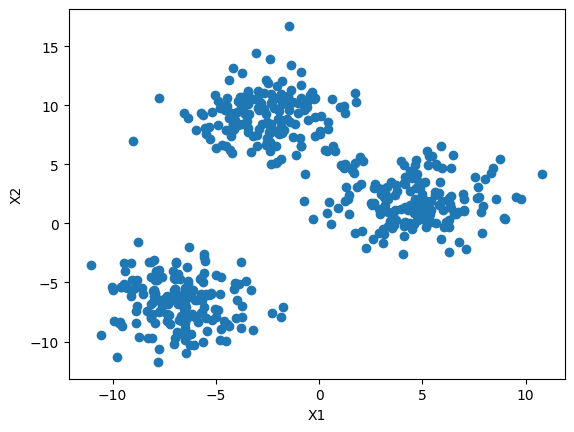

In [4]:
plt.scatter(df['X1'],df['X2'])
plt.xlabel('X1')
plt.ylabel('X2')

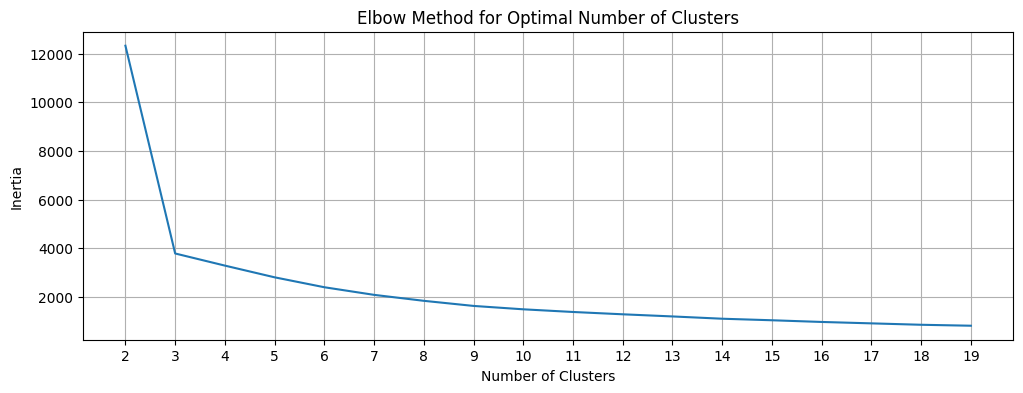

In [7]:
# Importing the necessary library for KMeans clustering
from sklearn.cluster import KMeans
# Initializing an empty list to store the inertia values for different numbers of clusters
inertias = []

# Looping over different numbers of clusters from 2 to 19
for k in range(2, 20):
    # Creating a KMeans object with k clusters, using 'k-means++' initialization method
    # Setting random_state for reproducibility of results
    kmeans = KMeans(init='k-means++', random_state=0, n_clusters=k, n_init=10)

    # Fitting the KMeans model to the data
    kmeans.fit(df)

    # Appending the inertia (within-cluster sum of squares) to the list
    inertias.append(kmeans.inertia_)

# Plotting the inertia values against the number of clusters
plt.figure(figsize=(12, 4))
plt.grid()
plt.plot(range(2, 20), inertias)
plt.xticks(range(2, 20))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


After determing by the chart above the optimal number of clusters is 3 or 4 since the drop in inertia levels out and then only drops gradually.

In [9]:
#reunning the k-means algo to determine the slusters centroids
kmeans = KMeans(random_state=0, n_clusters=3)
kmeans.fit(df)
print(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-2.56005145  9.07257054]
 [-6.78277285 -6.63304128]
 [ 4.58815239  1.91636363]]


sklearn the automatically assigns an index to each cluster. As there are 3 clusters in the above example the indexs are 0,1 and 2. To get the cluster of instance, we use the predict() method

In [10]:
#getting the cluster from the first row in the df
print(kmeans.predict(df.loc[[0]]))

[1]


In [16]:
#getting the cluster for a new point (-2,10)
print(kmeans.predict([[-2, 10]]))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [17]:
#Getting all of the clusters for all the points

df['Cluster'] = kmeans.labels_
df.head()

,X1,X2,Cluster
0,-4.581081,-8.286462,1
1,-0.753894,1.864580,2
2,9.019485,0.356573,2
3,-3.293414,6.087256,0
4,7.042307,1.157019,2


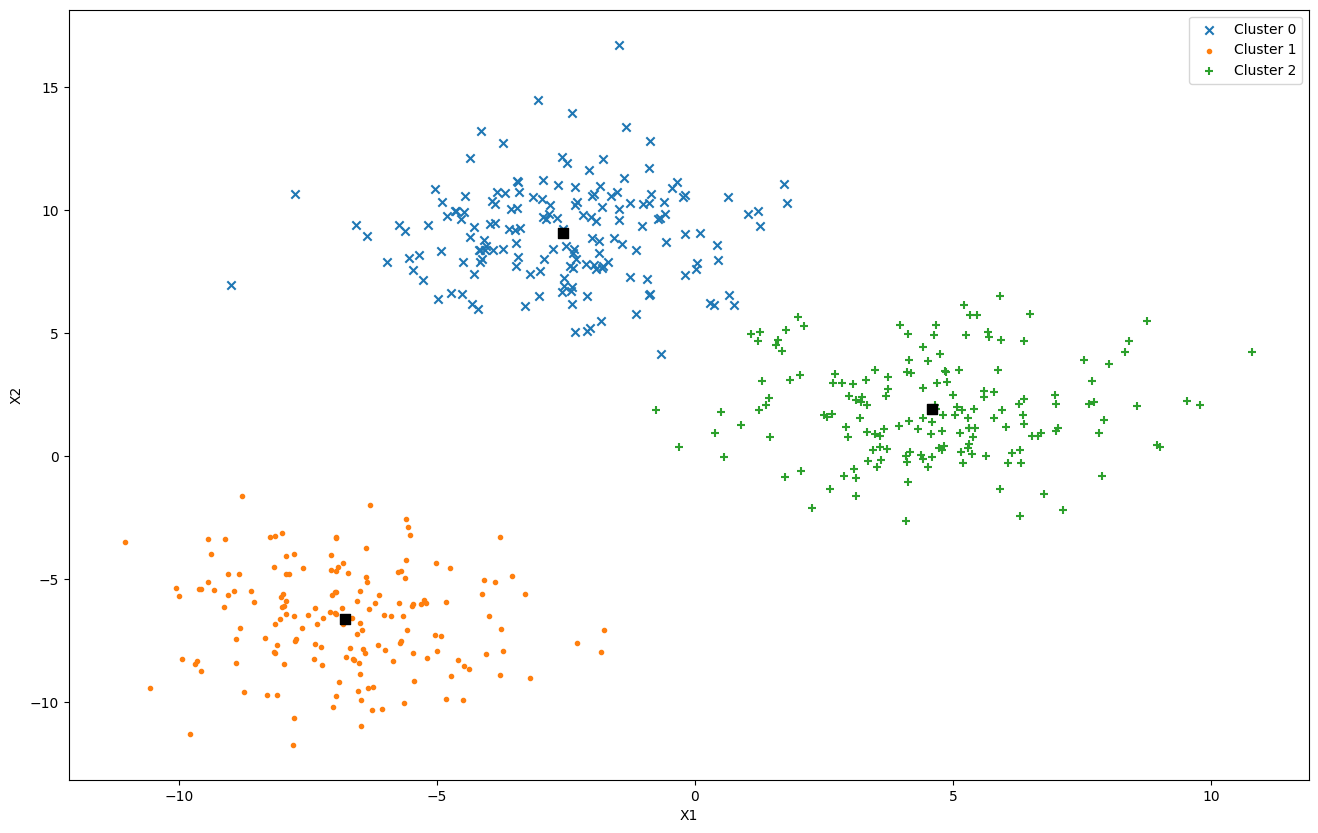

In [24]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Setting the figure size for the scatter plot
plt.figure(figsize=(16, 10))

# Defining markers for different clusters
markers = ['x', '.', '+']

# Iterating over each cluster
for i in range(0, 3):
    # Creating a condition to filter data points belonging to the current cluster
    cond = df['Cluster'] == i

    # Extracting data points belonging to the current cluster
    df2 = df[cond]

    # Plotting the data points of the current cluster on the scatter plot
    plt.scatter(df2['X1'], df2['X2'], label='Cluster ' + str(i), marker=markers[i])

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', s=50, marker="s")

# Adding labels to the axes
plt.xlabel('X1')
plt.ylabel('X2')

# Adding a legend to the plot
plt.legend()
